In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mofax as mfx

rcParams['figure.dpi'] = 200

In [2]:
m = mfx.mofa_model("model/mofa.hdf5")

In [3]:
print(f"""\
Cells: {m.shape[0]}
Features: {m.shape[1]}
Groups of cells: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Cells: 5183
Features: 24794
Groups of cells: GO_HPO-View
Views: GO_BP, GO_CC, GO_MF, HPO



In [4]:
# HDF5 group
print("HDF5 group:\n", m.weights)

# np.ndarray
print("\nnp.ndarray:\n", m.get_weights()[:3,:5])

# pd.DataFrame
print("\npd.DataFrame:\n", m.get_weights(df=True).iloc[:3,:5])

HDF5 group:
 <HDF5 group "/expectations/W" (4 members)>

np.ndarray:
 [[-9.52741605e-05 -3.03135351e-04 -2.16392294e-04 -6.01767180e-04
  -3.06574893e-03]
 [-3.64098914e-06  5.31045807e-04 -2.63154409e-04 -1.88749534e-03
  -1.29046417e-03]
 [ 1.79843950e-05  6.68335849e-04 -3.54542432e-04 -2.04266762e-03
  -1.42759793e-02]]

pd.DataFrame:
              Factor1   Factor2   Factor3   Factor4   Factor5
GO.0006805 -0.000095 -0.000303 -0.000216 -0.000602 -0.003066
GO.0006400 -0.000004  0.000531 -0.000263 -0.001887 -0.001290
GO.0006418  0.000018  0.000668 -0.000355 -0.002043 -0.014276


/home/filippo/code/sciviz/assignments/.venv/lib/python3.12/site-packages/mofax/plot_weights.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna({"to_label": False})


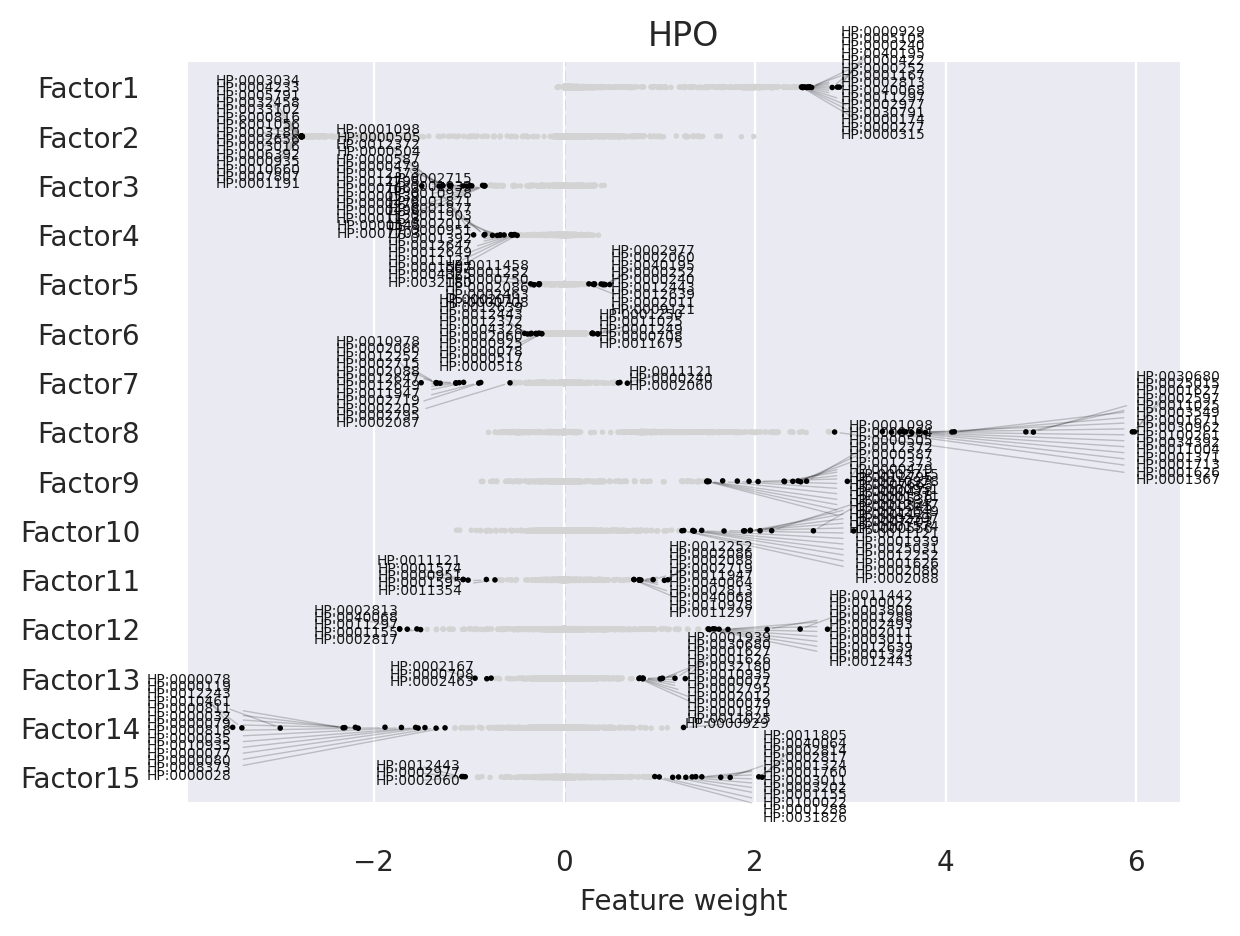

In [5]:
ax = mfx.plot_weights(m, views=["HPO"], n_features=15)

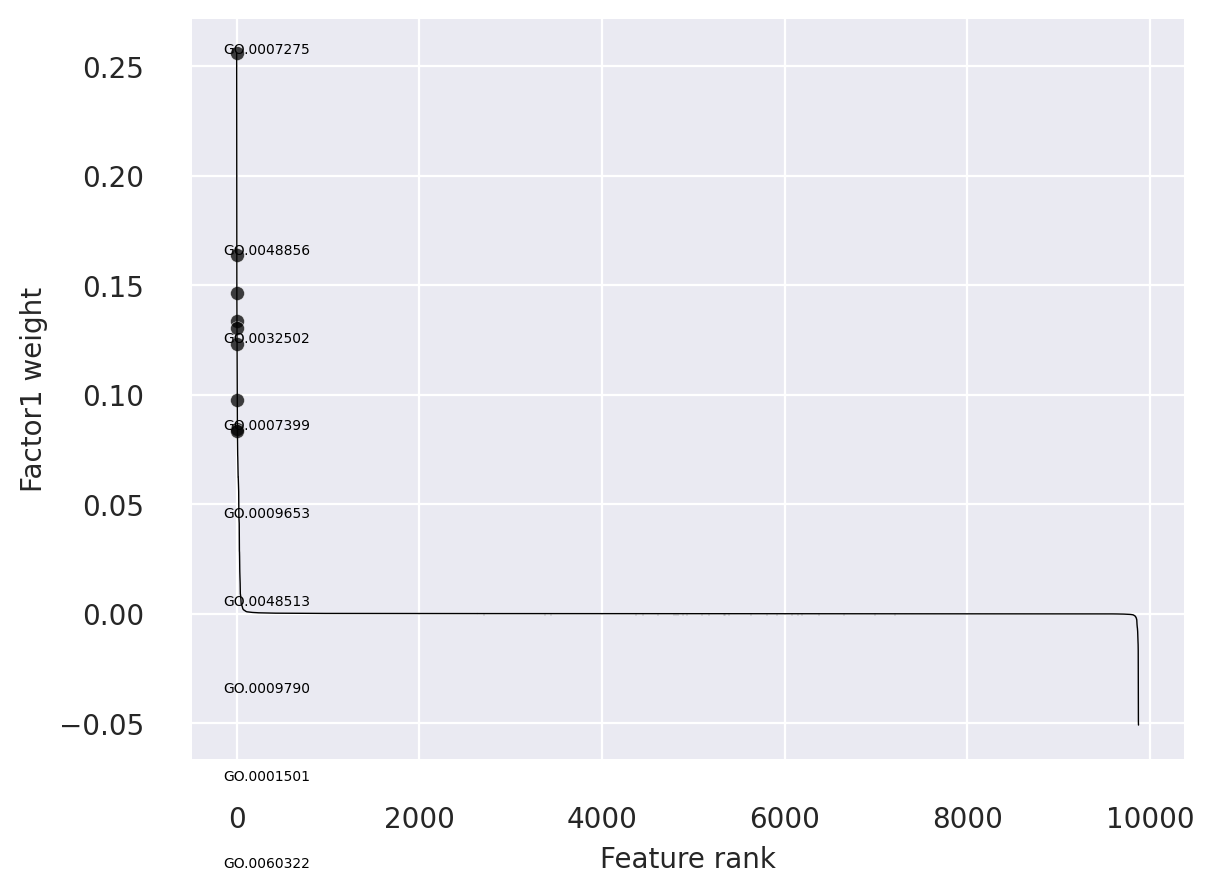

In [6]:
ax = mfx.plot_weights_ranked(m, factor=0, n_features=10,
                             y_repel_coef=0.04, x_rank_offset=-150)
# repel coefficient and offsets can be useful to move labels around
# and there are x_rank_offset and x_rank_offset_neg for positive and negative weights respectively

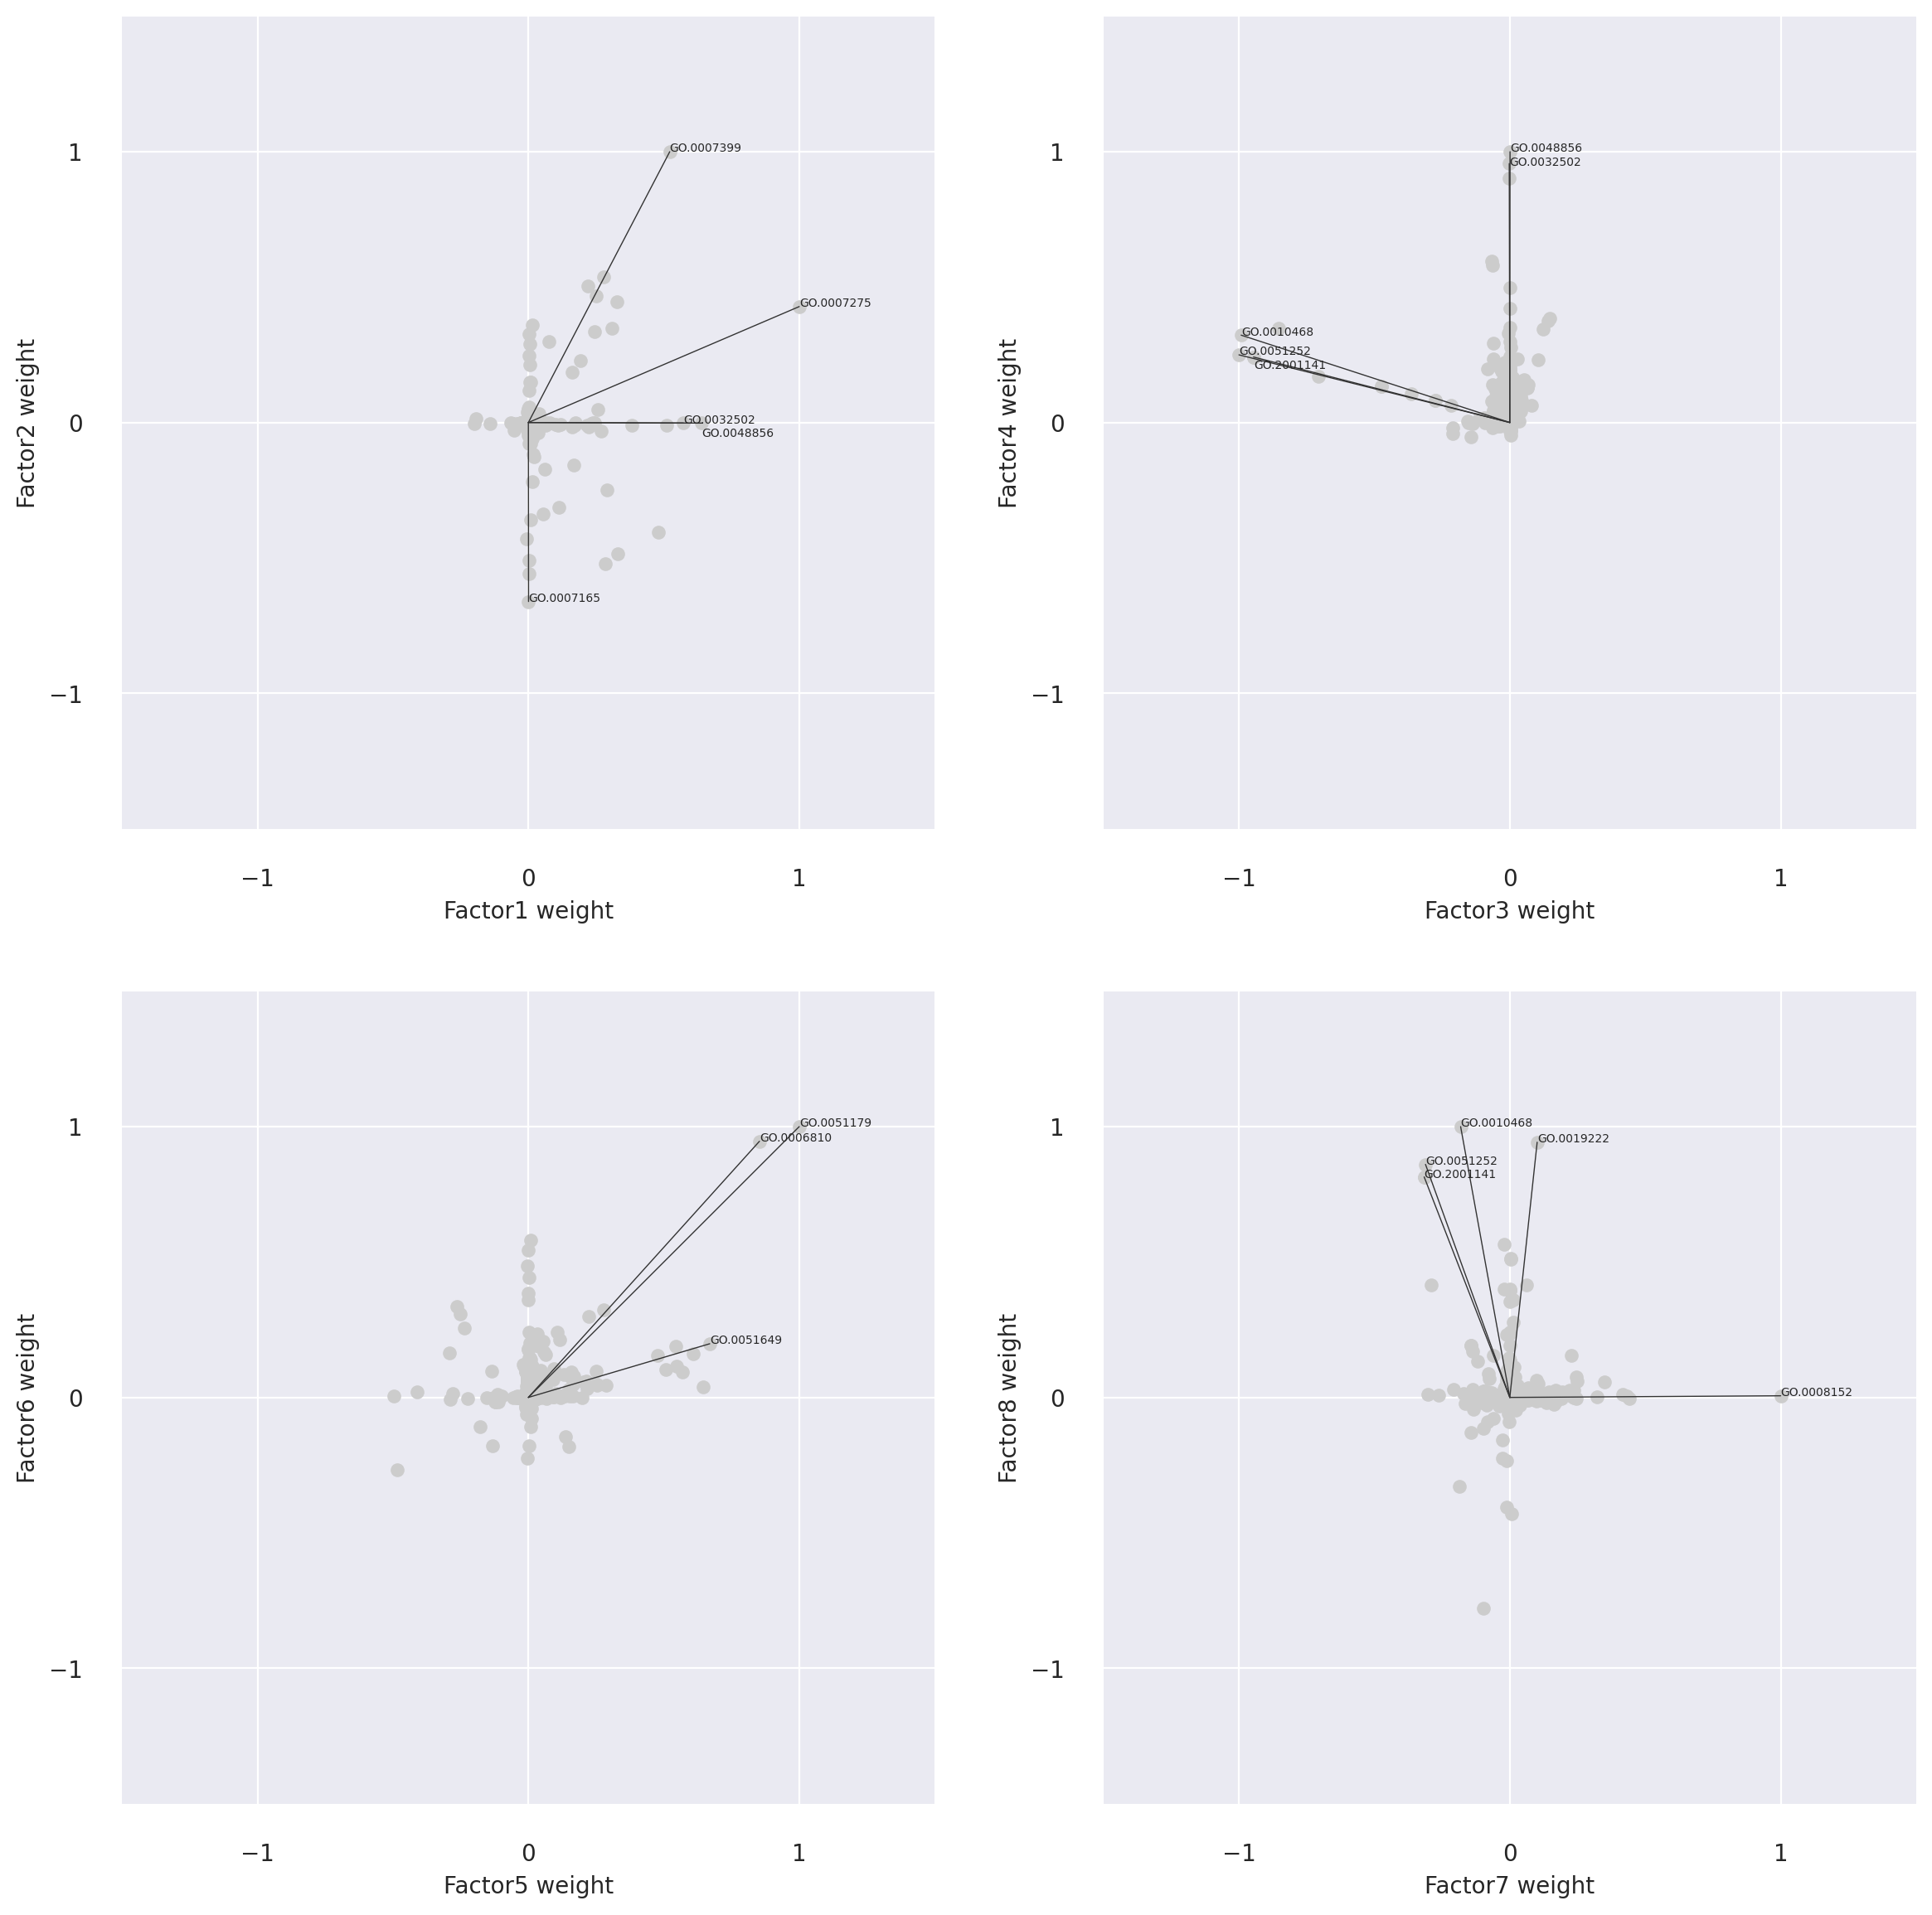

In [7]:
nf = 2
f, axarr = plt.subplots(nf, nf, figsize=(14,14))
fnum = 0
for i in range(nf):
    for j in range(nf):
        mfx.plot_weights_scaled(m, x=fnum, y=fnum+1, n_features=5, ax=axarr[i][j])
        fnum+=2

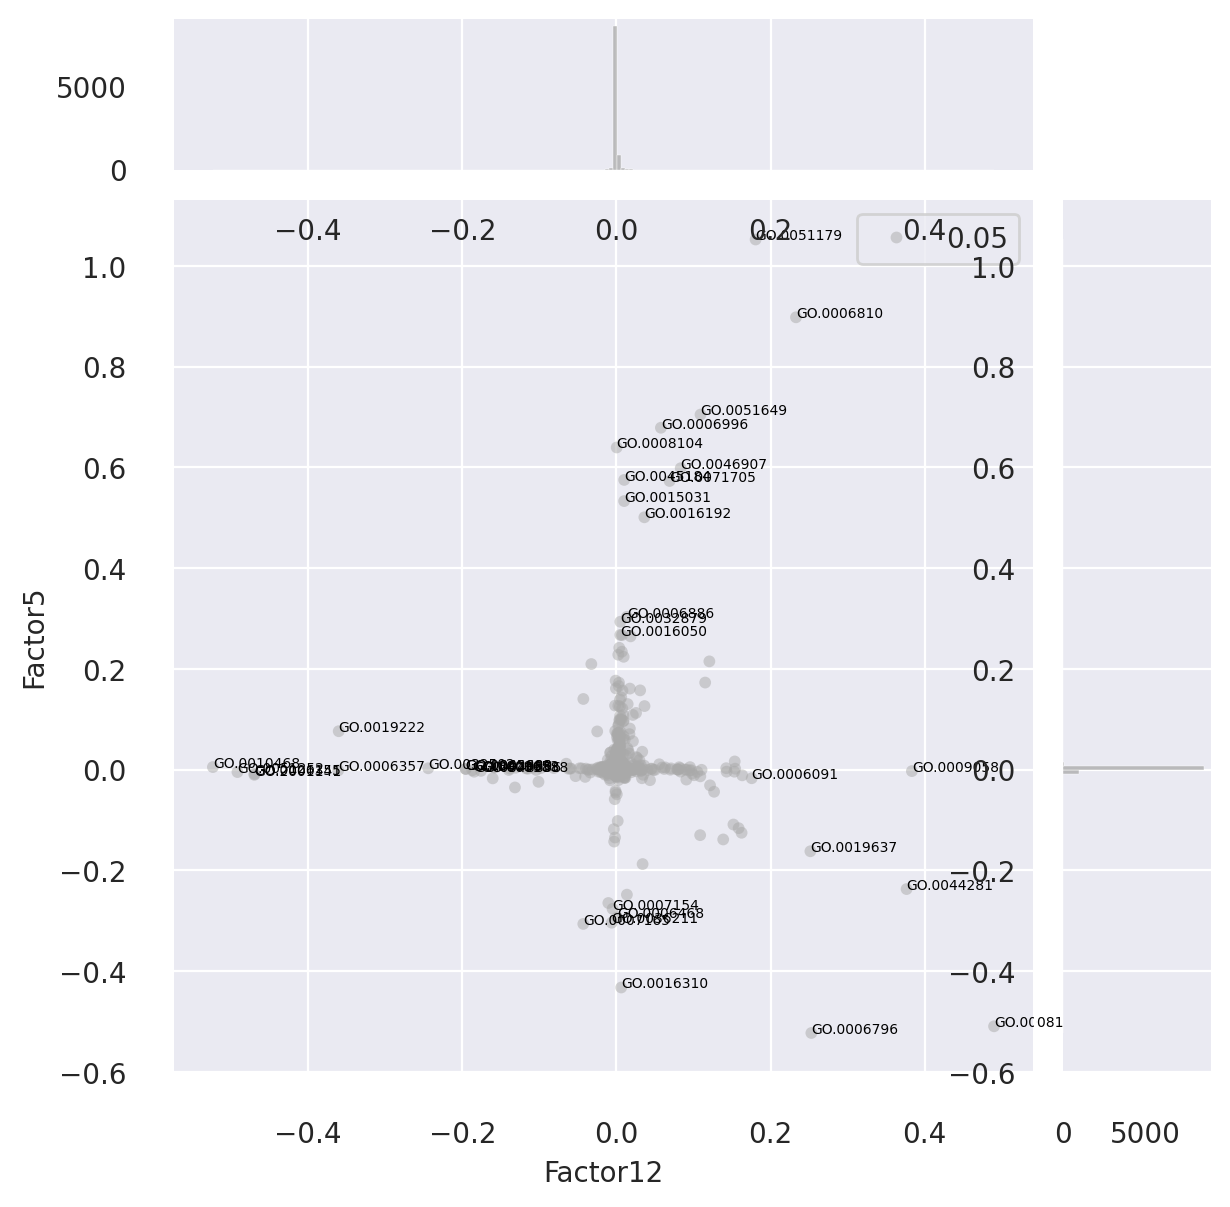

In [8]:
mfx.plot_weights_scatter(m, x="Factor12", y="Factor5",
                         hist=True, n_features=20,
                         size=0.05, linewidth=0, alpha=0.5)

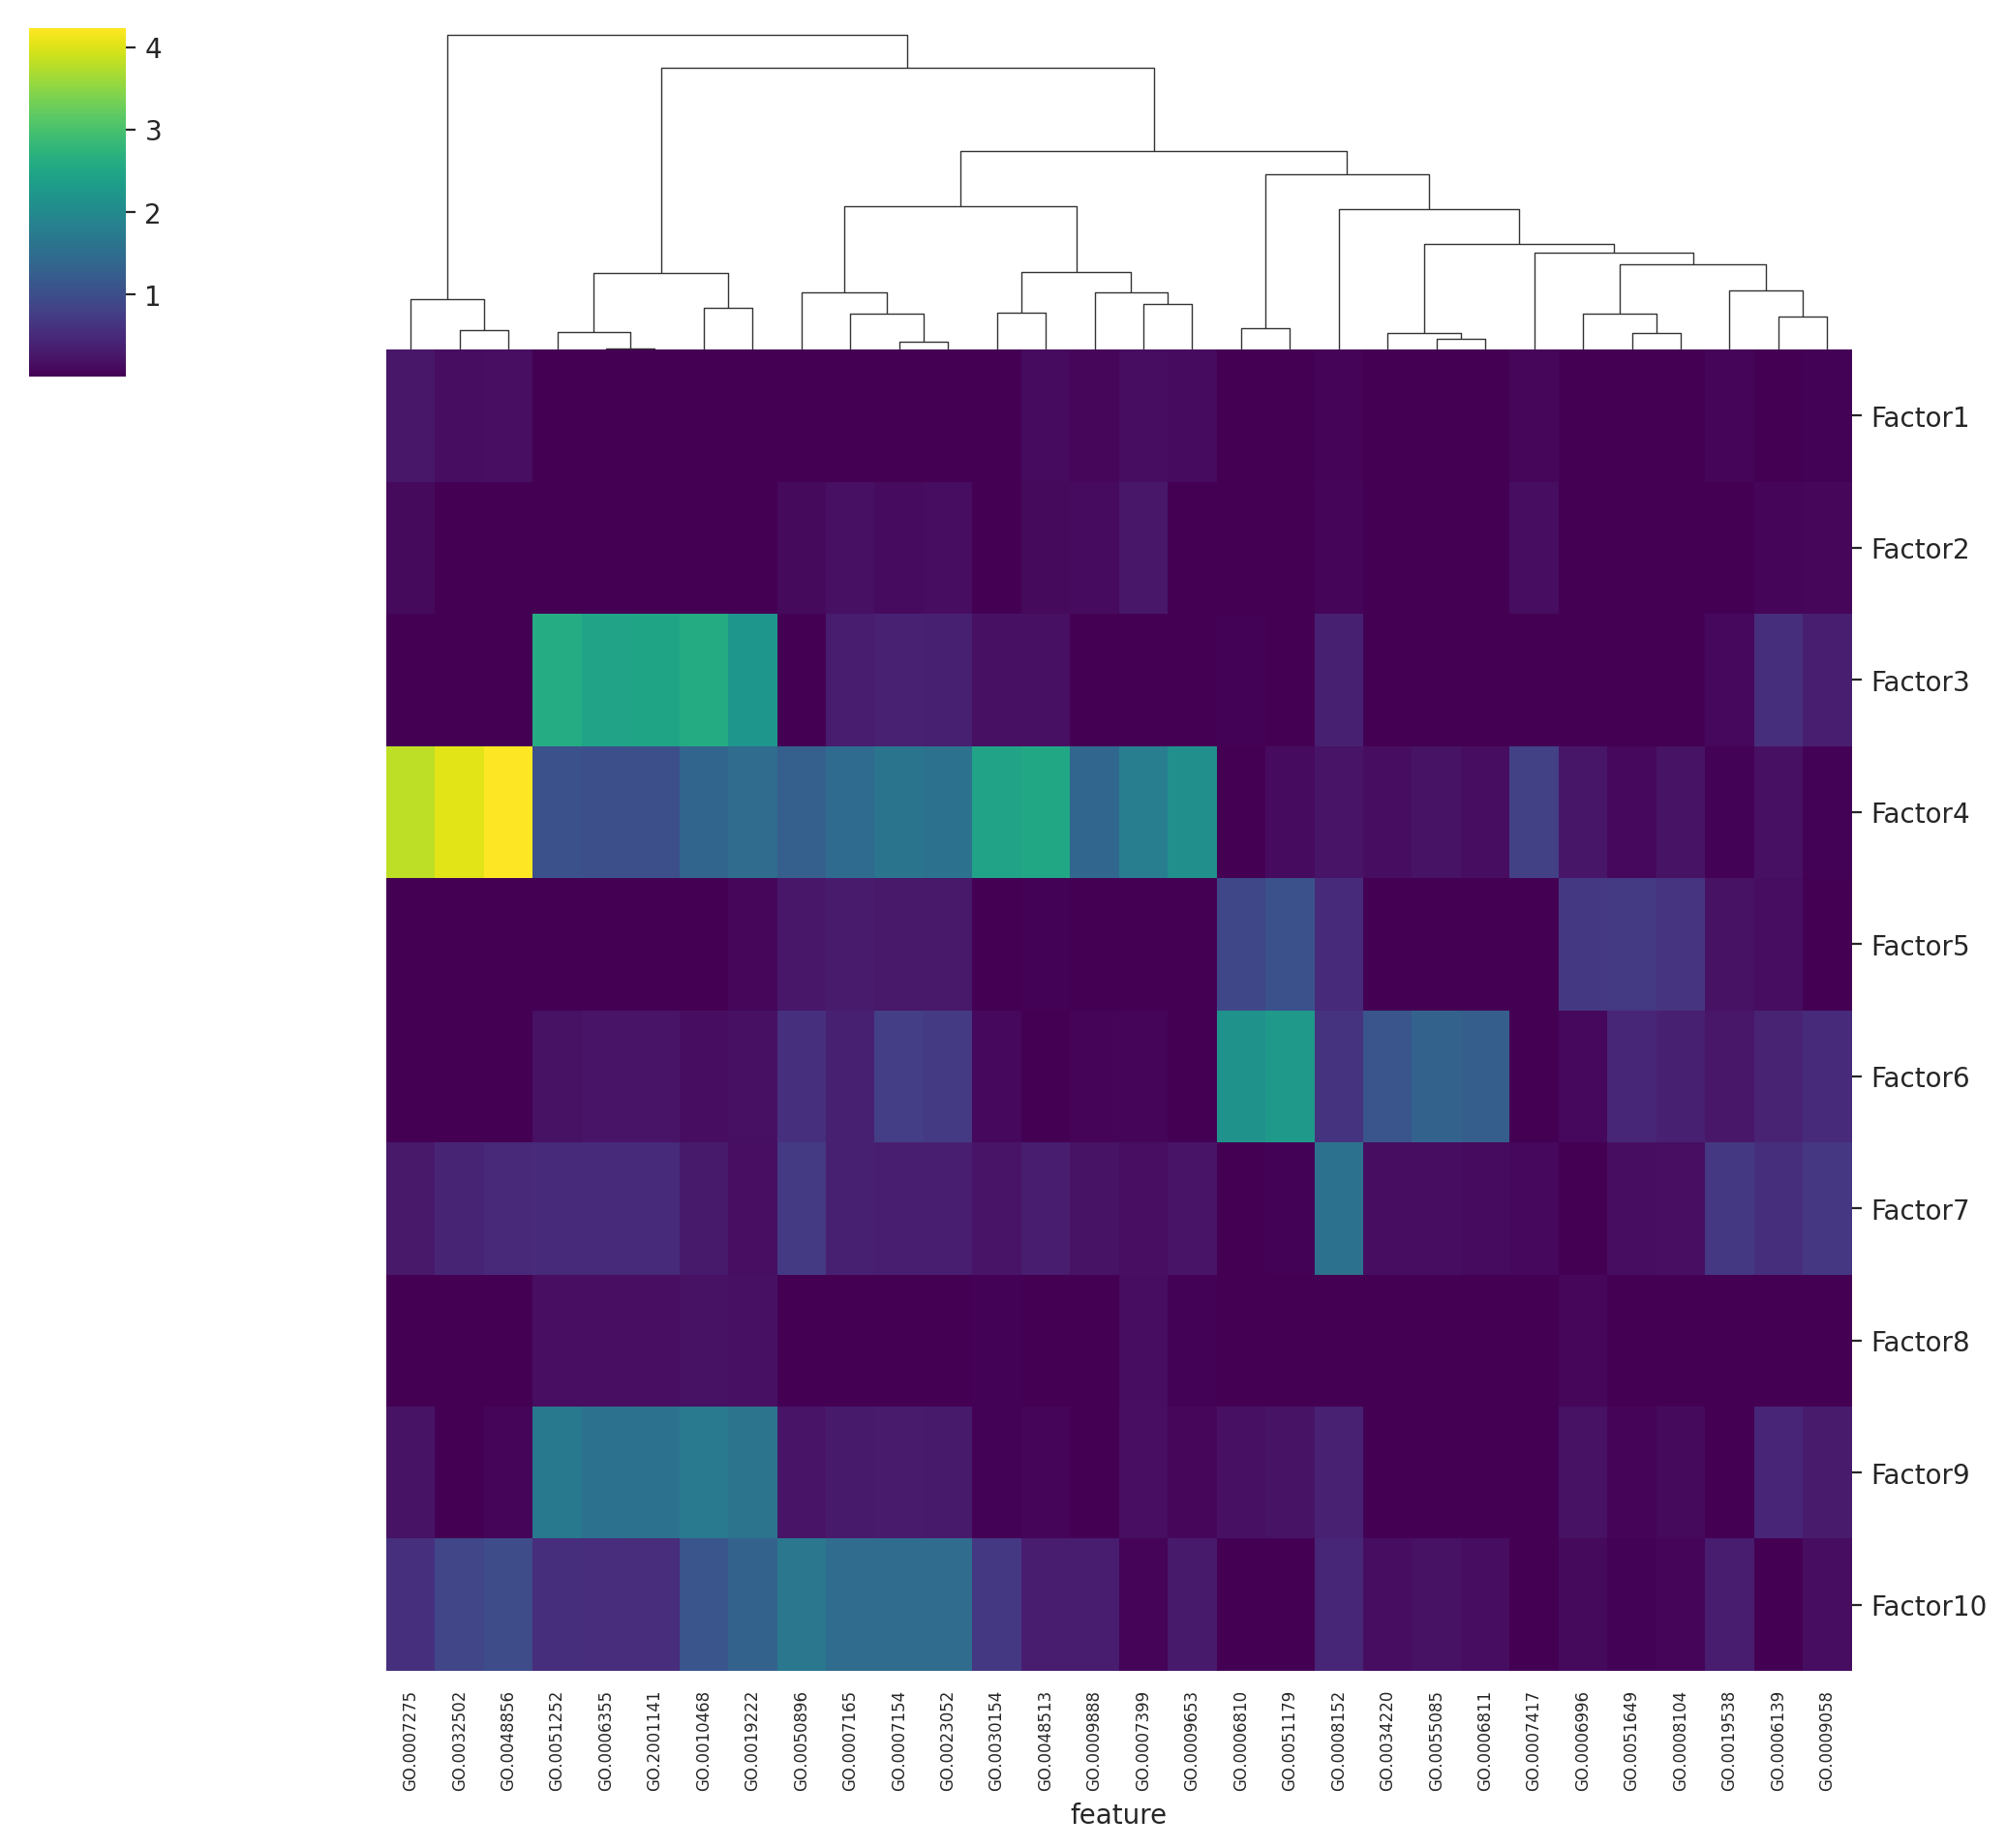

In [9]:
mfx.plot_weights_heatmap(m, n_features=5,
                         factors=range(0, 10),
                         xticklabels_size=6, w_abs=True,
                         cmap="viridis", cluster_factors=False)

<Axes: >

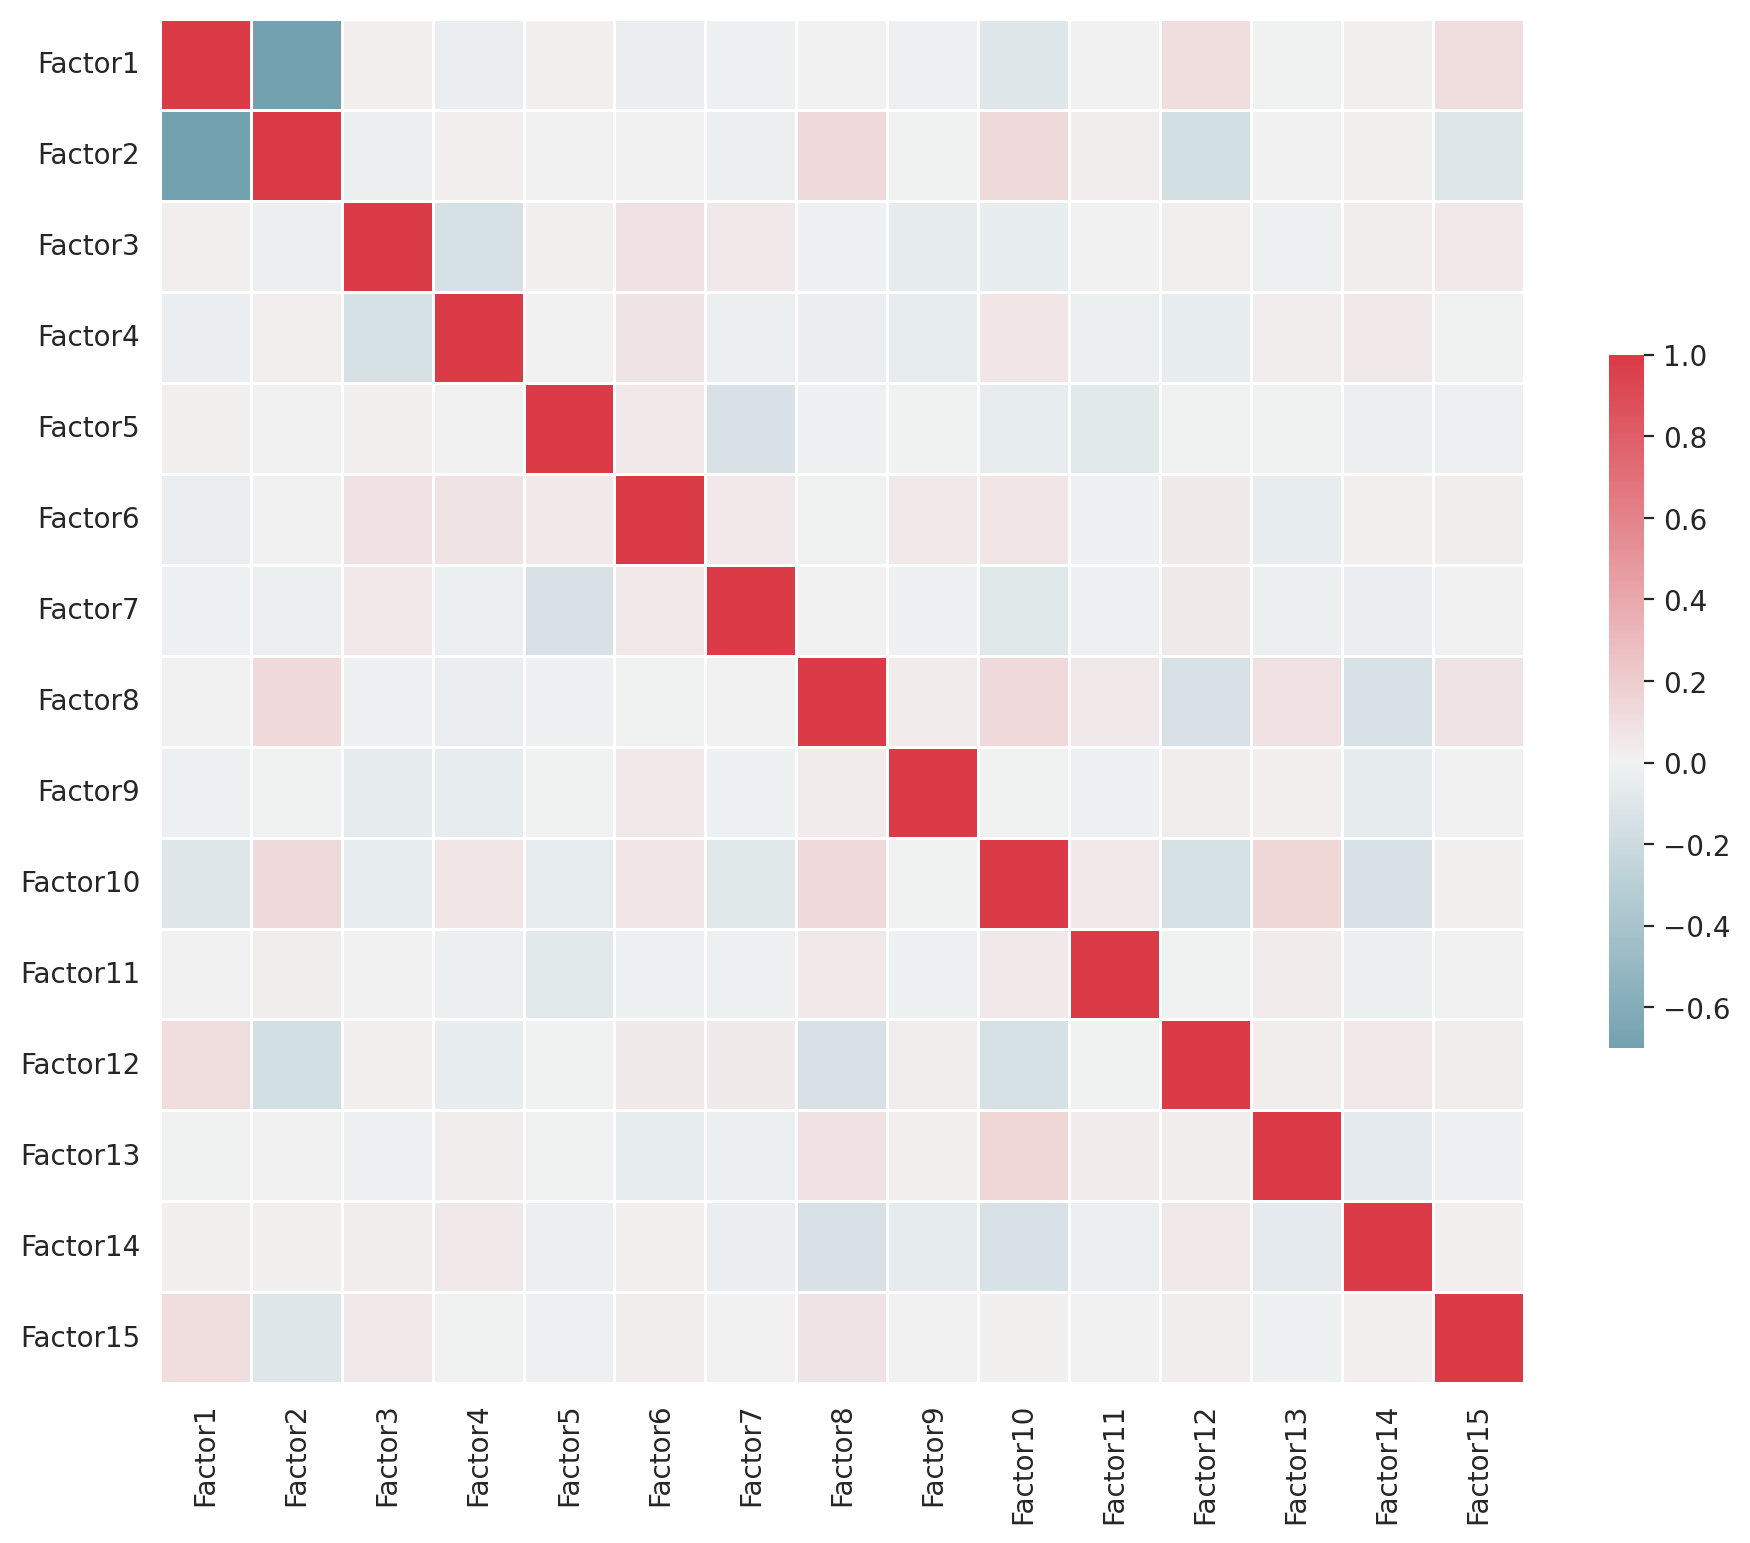

In [10]:
mfx.plot_weights_correlation(m)

<Axes: title={'center': 'Factor4'}, xlabel='Factor1', ylabel='Factor4'>

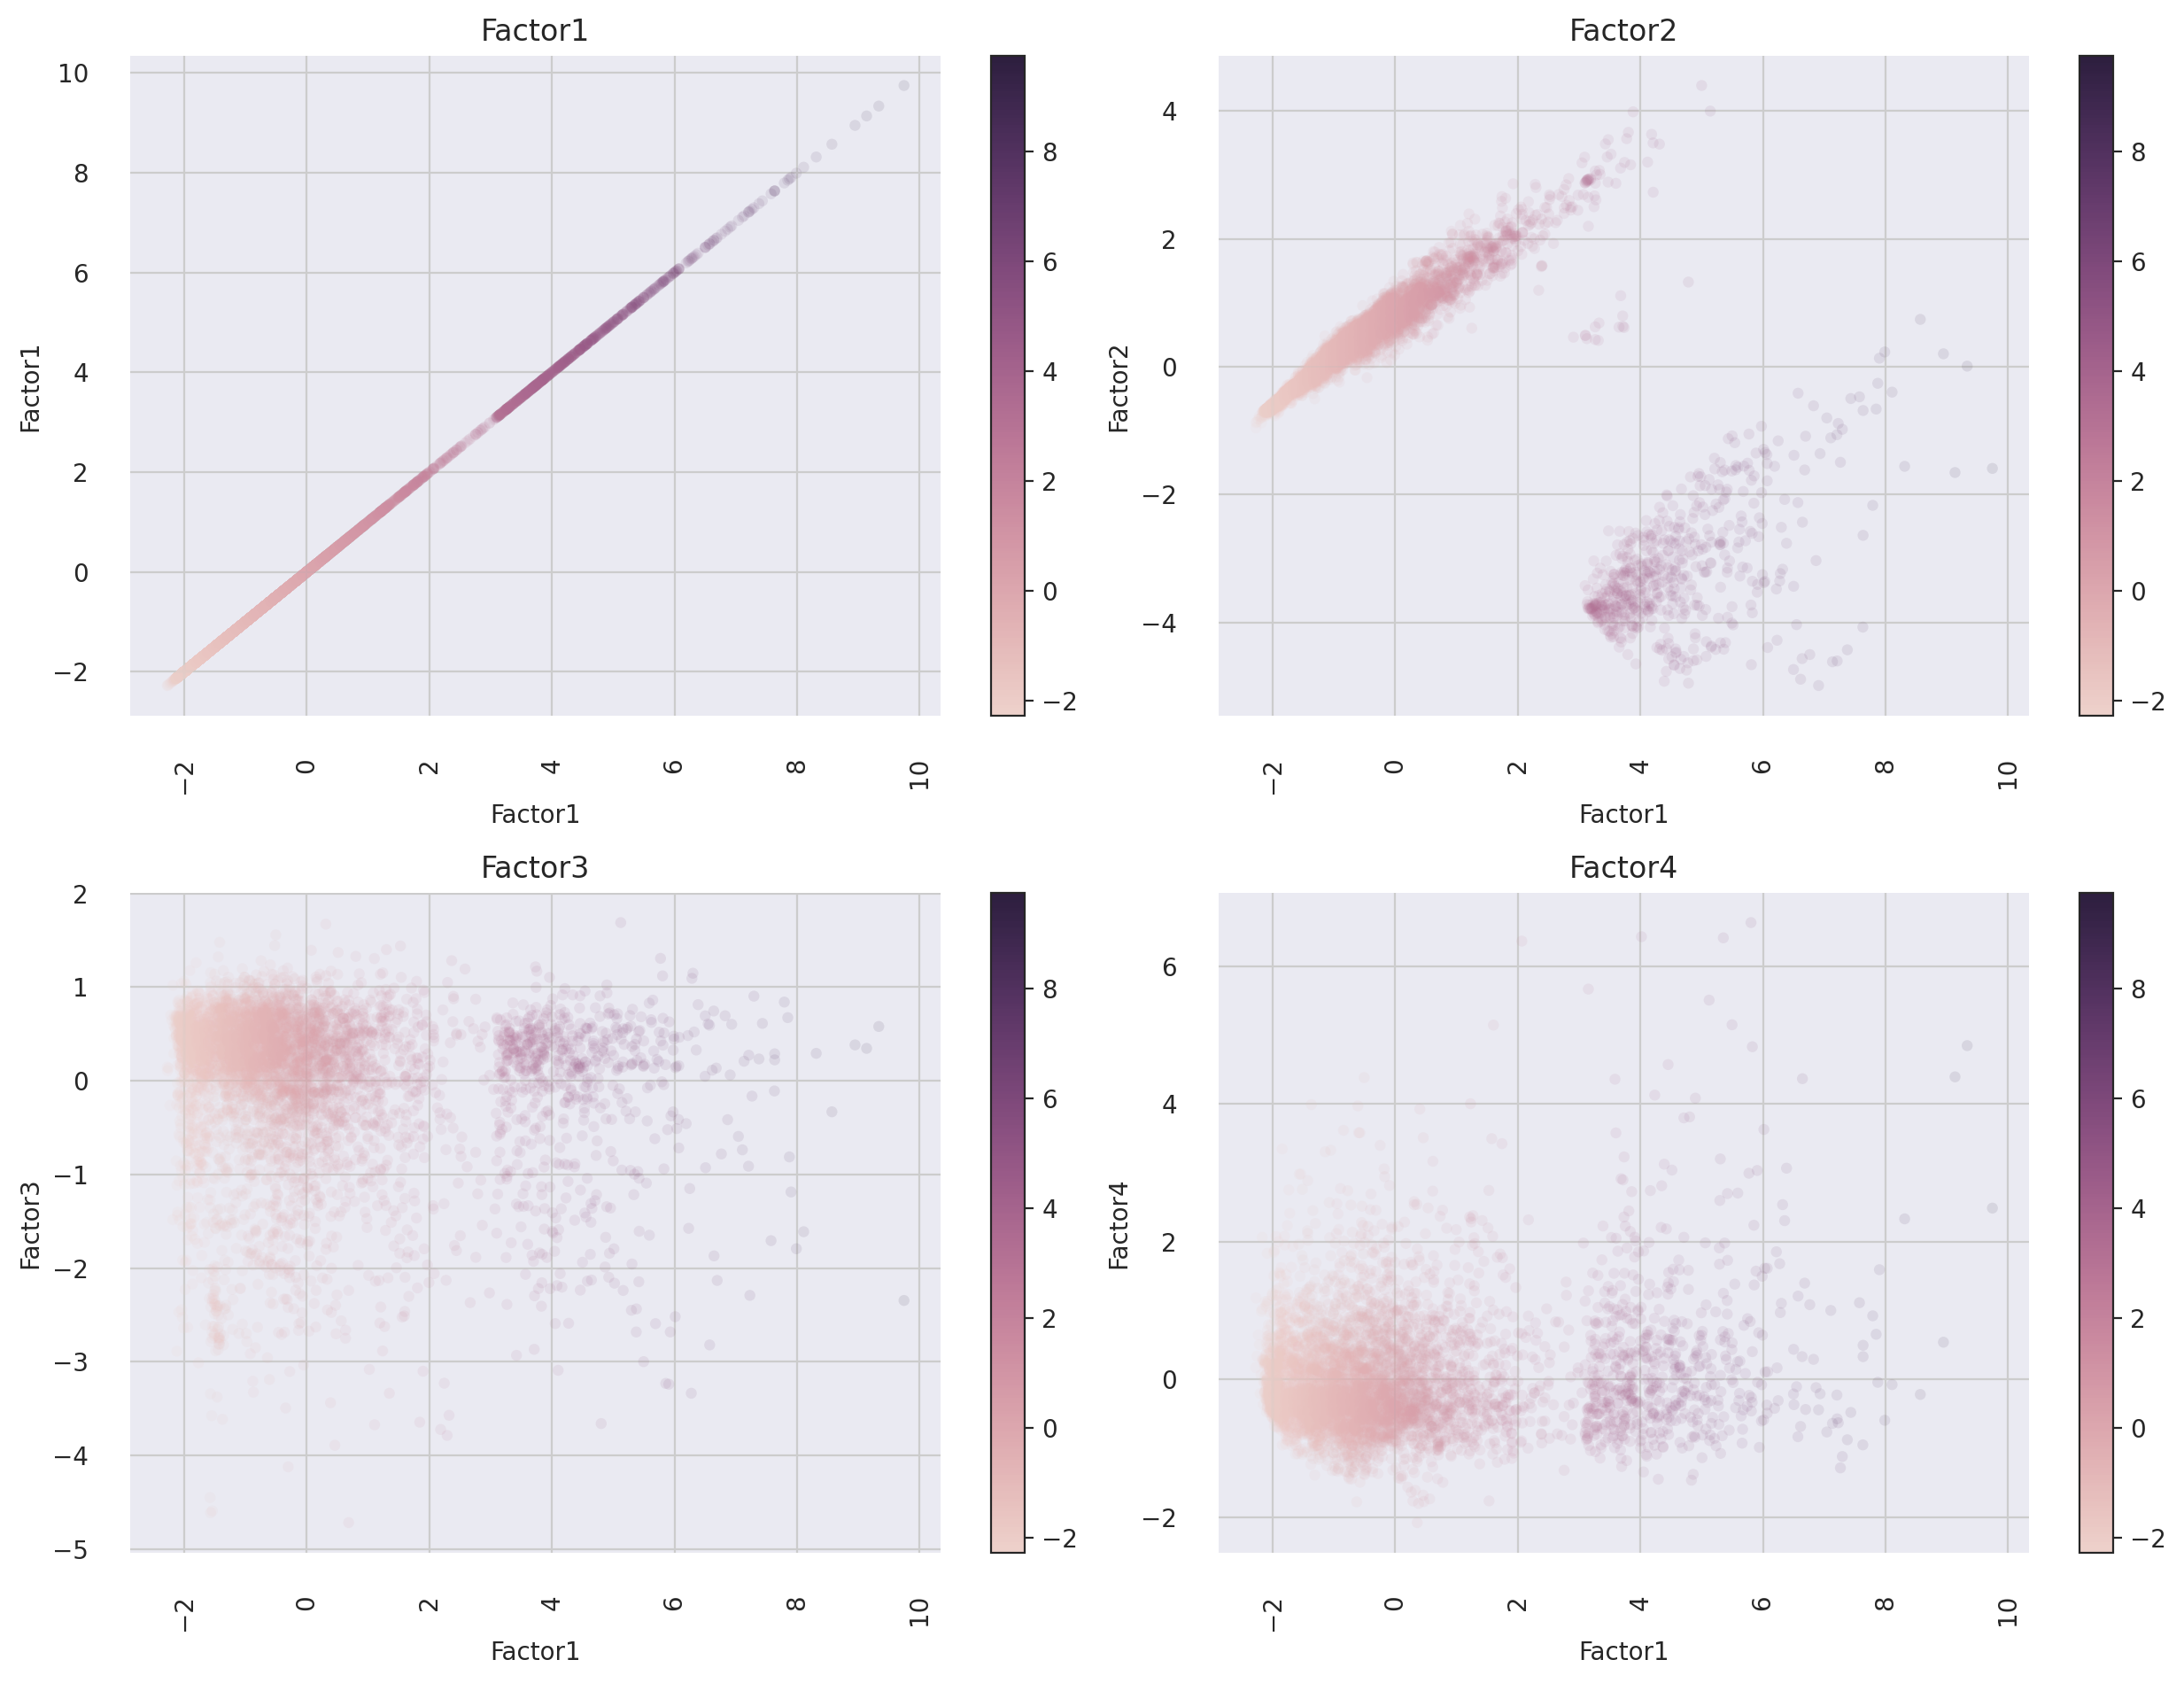

In [11]:
mfx.plot_factors_scatter(
    m,
    x="Factor1", y=range(4), group_label="Factor1", color='Factor1',
    alpha=.1,
    rotate_x_labels=90, ncols=2,
)